In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch
from matplotlib import pyplot as plt

from common import Gaussian, GaussianMixture, imshow_density
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


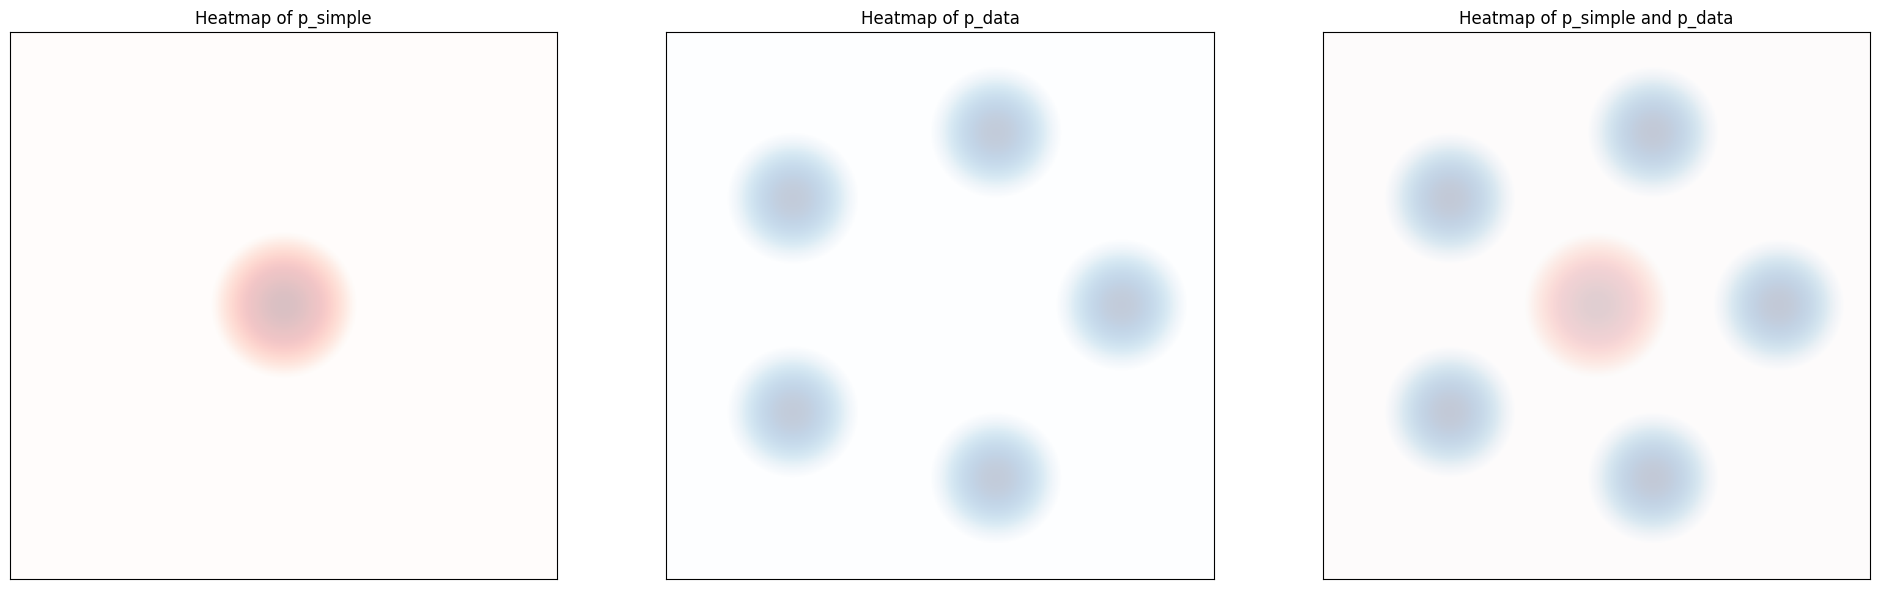

In [7]:
# Constants for the duration of our use of Gaussian conditional probability paths, to avoid polluting the namespace...
PARAMS = {
    "scale": 15.0,
    "target_scale": 10.0,
    "target_std": 1.0,
}

p_simple = Gaussian.isotropic(dim=2, std=1.0).to(device)
p_data = GaussianMixture.symmetric_2D(nmodes=5, std=PARAMS["target_std"], scale=PARAMS["target_scale"]).to(device)

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
bins = 200

scale = PARAMS["scale"]
x_bounds = [-scale, scale]
y_bounds = [-scale, scale]

axes[0].set_title('Heatmap of p_simple')
axes[0].set_xticks([])
axes[0].set_yticks([])
imshow_density(density=p_simple, x_bounds=x_bounds, y_bounds=y_bounds, bins=200,
                ax=axes[0], vmin=-10, alpha=0.25, cmap=plt.get_cmap('Reds'))

axes[1].set_title('Heatmap of p_data')
axes[1].set_xticks([])
axes[1].set_yticks([])
imshow_density(density=p_data, x_bounds=x_bounds, y_bounds=y_bounds, bins=200,
                ax=axes[1], vmin=-10, alpha=0.25, cmap=plt.get_cmap('Blues'))

axes[2].set_title('Heatmap of p_simple and p_data')
axes[2].set_xticks([])
axes[2].set_yticks([])
imshow_density(density=p_simple, x_bounds=x_bounds, y_bounds=y_bounds,
                bins=200, vmin=-10, alpha=0.25, cmap=plt.get_cmap('Reds'))
imshow_density(density=p_data, x_bounds=x_bounds, y_bounds=y_bounds,
                bins=200, vmin=-10, alpha=0.25, cmap=plt.get_cmap('Blues'))